# VaxRisk: Analysis of VAERS Reports for Vaccine Safety Assessment

## VAERS Data overview
The Vaccine Adverse Event Reporting System (VAERS) is a crucial tool for monitoring vaccine safety in the United States. Key points about VAERS data include:
1. Open Reporting System: VAERS accepts reports from healthcare providers, vaccine manufacturers, and the general public.
2. Broad Scope: The system encourages reporting of any clinically significant health issues following vaccination, even if causality is uncertain.
3. Limitations: VAERS reports alone cannot determine if a vaccine caused an adverse event, as they may include coincidental events
4. Mandatory Reporting: In certain situations, healthcare providers and vaccine manufacturers are required to report to VAERS.

## Data Structure
VAERS data is distributed in three CSV files per year, containing demographic information, vaccine details, and symptom data. The data is from the years 1990 to 2024.
1. VAERSDATA.csv
2. VAERSSYMPTOMS.csv
3. VAERSVAX.csv

## We are working on recent data from the years 2015 to 2024.

# Data Loading

In [12]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# Read the files
path = r"C:\Users\chand\Downloads\606\AllVAERSDataCSVS"
files = os.listdir(path)
print(files)

['1990VAERSDATA.csv', '1990VAERSSYMPTOMS.csv', '1990VAERSVAX.csv', '1991VAERSDATA.csv', '1991VAERSSYMPTOMS.csv', '1991VAERSVAX.csv', '1992VAERSDATA.csv', '1992VAERSSYMPTOMS.csv', '1992VAERSVAX.csv', '1993VAERSDATA.csv', '1993VAERSSYMPTOMS.csv', '1993VAERSVAX.csv', '1994VAERSDATA.csv', '1994VAERSSYMPTOMS.csv', '1994VAERSVAX.csv', '1995VAERSDATA.csv', '1995VAERSSYMPTOMS.csv', '1995VAERSVAX.csv', '1996VAERSDATA.csv', '1996VAERSSYMPTOMS.csv', '1996VAERSVAX.csv', '1997VAERSDATA.csv', '1997VAERSSYMPTOMS.csv', '1997VAERSVAX.csv', '1998VAERSDATA.csv', '1998VAERSSYMPTOMS.csv', '1998VAERSVAX.csv', '1999VAERSDATA.csv', '1999VAERSSYMPTOMS.csv', '1999VAERSVAX.csv', '2000VAERSDATA.csv', '2000VAERSSYMPTOMS.csv', '2000VAERSVAX.csv', '2001VAERSDATA.csv', '2001VAERSSYMPTOMS.csv', '2001VAERSVAX.csv', '2002VAERSDATA.csv', '2002VAERSSYMPTOMS.csv', '2002VAERSVAX.csv', '2003VAERSDATA.csv', '2003VAERSSYMPTOMS.csv', '2003VAERSVAX.csv', '2004VAERSDATA.csv', '2004VAERSSYMPTOMS.csv', '2004VAERSVAX.csv', '2005VAER

## Filter files from year 2015 to 2024 and then concatenate the contents of the filtered CSV files into a single DataFrame for each dataset.

In [5]:
# Function to filter CSV files from years 2015-2024
def filter_files(files):
    return [f for f in files if f.split(os.path.sep)[-1][:4].isdigit() and 2015 <= int(f.split(os.path.sep)[-1][:4]) <= 2024]

# Use glob to get all the CSV files for each dataset type (DATA, SYMPTOMS, VAX)
data_files = filter_files(glob.glob(os.path.join(path, '*VAERSDATA.csv')))
symptom_files = filter_files(glob.glob(os.path.join(path, '*VAERSSYMPTOMS.csv')))
vaccine_files = filter_files(glob.glob(os.path.join(path, '*VAERSVAX.csv')))

# Function to read and concatenate multiple the csv files
def read_and_concat(files):
    return pd.concat([pd.read_csv(f, encoding='latin1', low_memory=False) for f in files], ignore_index=True)

In [7]:
# Read and concatenate the data
data_df = read_and_concat(data_files)
symptom_df = read_and_concat(symptom_files)
vaccine_df = read_and_concat(vaccine_files)

# Understanding patient data

In [10]:
data_df.head(2)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
0    560330  01/01/2015    UT      1.3      1.0      0.3   M  01/01/2015   
1    560331  01/01/2015    TN     66.0     66.0      NaN   F  01/01/2015   

                                        SYMPTOM_TEXT DIED  ... CUR_ILL  \
0  Pinpoint rash on torso, belly, back, neck, chi...  NaN  ...     NaN   
1  Around 3:30 PM 12/22/14 shaking chills, aches,...  NaN  ...      No   

  HISTORY PRIOR_VAX SPLTTYPE  FORM_VERS TODAYS_DATE BIRTH_DEFECT OFC_VISIT  \
0     NaN       NaN      NaN          1         NaN          NaN       NaN   
1     NaN       NaN      NaN          1         NaN          NaN       NaN   

  ER_ED_VISIT ALLERGIES  
0         NaN       NaN  
1         NaN       NaN  

[2 rows x 35 columns]

In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418326 entries, 0 to 1418325
Data columns (total 35 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1418326 non-null  int64  
 1   RECVDATE      1418326 non-null  object 
 2   STATE         1173264 non-null  object 
 3   AGE_YRS       1197353 non-null  float64
 4   CAGE_YR       1079665 non-null  float64
 5   CAGE_MO       39119 non-null    float64
 6   SEX           1418326 non-null  object 
 7   RPT_DATE      116389 non-null   object 
 8   SYMPTOM_TEXT  1416362 non-null  object 
 9   DIED          20747 non-null    object 
 10  DATEDIED      17991 non-null    object 
 11  L_THREAT      18429 non-null    object 
 12  ER_VISIT      23059 non-null    object 
 13  HOSPITAL      103102 non-null   object 
 14  HOSPDAYS      60712 non-null    float64
 15  X_STAY        800 non-null      object 
 16  DISABLE       25012 non-null    object 
 17  RECOVD        1259992 non-n

In [12]:
data_df.shape

(1418326, 35)

# Understanding symptoms df

In [14]:
symptom_df.head(2)

VAERS_ID  SYMPTOM1  SYMPTOMVERSION1 SYMPTOM2  SYMPTOMVERSION2  SYMPTOM3  \
0    560330      Rash             17.1      NaN              NaN       NaN   
1    560331  Asthenia             16.1   Chills             16.1  Headache   

   SYMPTOMVERSION3                SYMPTOM4  SYMPTOMVERSION4 SYMPTOM5  \
0              NaN                     NaN              NaN      NaN   
1             16.1  Laboratory test normal             16.1     Pain   

   SYMPTOMVERSION5  
0              NaN  
1             16.1

In [15]:
symptom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1844343 entries, 0 to 1844342
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   VAERS_ID         int64  
 1   SYMPTOM1         object 
 2   SYMPTOMVERSION1  float64
 3   SYMPTOM2         object 
 4   SYMPTOMVERSION2  float64
 5   SYMPTOM3         object 
 6   SYMPTOMVERSION3  float64
 7   SYMPTOM4         object 
 8   SYMPTOMVERSION4  float64
 9   SYMPTOM5         object 
 10  SYMPTOMVERSION5  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 154.8+ MB


In [16]:
symptom_df.shape

(1844343, 11)

# Understanding Vaccine DF

In [18]:
vaccine_df.head(2)

VAERS_ID VAX_TYPE                     VAX_MANU VAX_LOT VAX_DOSE_SERIES  \
0    560330     FLUX         UNKNOWN MANUFACTURER     NaN               1   
1    560331     FLU4  GLAXOSMITHKLINE BIOLOGICALS   AR57J               1   

  VAX_ROUTE VAX_SITE                                      VAX_NAME  
0        IM       RL          INFLUENZA (SEASONAL) (NO BRAND NAME)  
1        ID       LA  INFLUENZA (SEASONAL) (FLULAVAL QUADRIVALENT)

In [19]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608874 entries, 0 to 1608873
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   VAERS_ID         1608874 non-null  int64 
 1   VAX_TYPE         1608874 non-null  object
 2   VAX_MANU         1608874 non-null  object
 3   VAX_LOT          1129442 non-null  object
 4   VAX_DOSE_SERIES  1590932 non-null  object
 5   VAX_ROUTE        1233421 non-null  object
 6   VAX_SITE         1157862 non-null  object
 7   VAX_NAME         1608874 non-null  object
dtypes: int64(1), object(7)
memory usage: 98.2+ MB


In [20]:
vaccine_df.shape

(1608874, 8)

## As we are predicting seriousness of the vaccine to the individuals, we want to know which are the top 4 vaccines which effected.

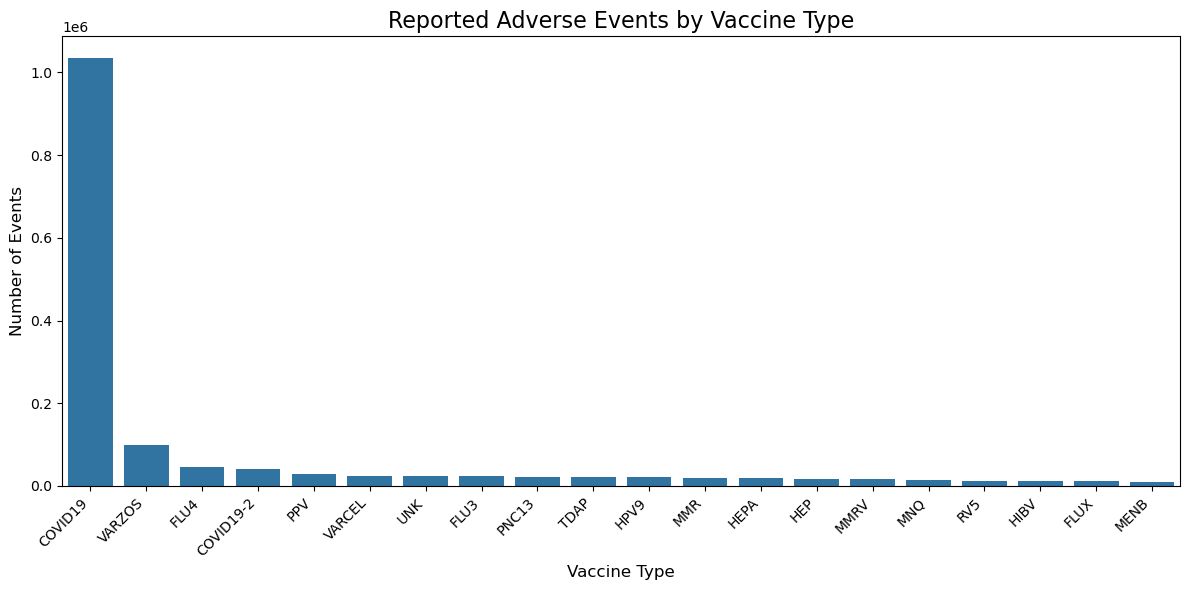

In [9]:
# Top 20 Vaccine Types by Reported Adverse Events
vax_type = vaccine_df['VAX_TYPE'].value_counts().nlargest(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=vax_type.index, y=vax_type.values)

plt.title('Reported Adverse Events by Vaccine Type', fontsize=16)
plt.ylabel('Number of Events', fontsize=12)
plt.xlabel('Vaccine Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [11]:
# Get unique vaccine types from the 'VAX_TYPE' column
unique_vaccine_types = vaccine_df['VAX_TYPE'].unique()

# Convert the result to a list for better readability (optional)
unique_vaccine_types_list = unique_vaccine_types.tolist()

# Print the unique vaccine types
print(unique_vaccine_types_list)


['FLUX', 'FLU4', 'DTAP', 'MEN', 'UNK', 'FLU3', 'VARZOS', 'HEP', 'PPV', 'TDAP', 'DTAPHEPBIP', 'HIBV', 'PNC13', 'HPV4', 'FLUN4', 'HEPA', 'VARCEL', 'MMRV', 'DT', 'TD', 'DTAPIPVHIB', 'IPV', 'MNQ', 'YF', 'MMR', 'FLUC3', 'HBHEPB', 'RV1', 'DTAPIPV', 'HEPAB', 'DTP', 'TYP', 'RV5', 'FLU(H1N1)', 'BCG', 'ANTH', 'RAB', 'DTPHEP', 'TTOX', 'RVX', 'SMALL', 'ADEN_4_7', 'FLUN3', 'HPVX', 'HPV9', 'DTAPH', 'PNC', 'RUB', 'FLUR3', 'OPV', 'JEV1', 'FLUX(H1N1)', 'DTPIPV', 'HPV2', 'DTIPV', 'JEVX', 'MENB', 'FLUN(H1N1)', 'DTPIHI', 'PER', '6VAX-F', 'DTOX', 'MUR', 'MEA', 'MM', 'MNQHIB', 'DTPHIB', 'DPP', 'TDAPIPV', 'MENHIB', 'LYME', 'JEV', 'DTPPHIB', 'FLUC4', 'MER', 'HBPV', 'HEPATYP', 'MU', 'PNC10', 'CHOL', 'SSEV', 'FLUA3', 'PLAGUE', 'FLUR4', 'CEE', 'TBE', 'ADEN', 'RV', 'FLUA4', 'DF', 'COVID19', 'EBZR', 'DTPPVHBHPB', 'H5N1', 'COVID19-2', 'PNC20', 'PNC15', 'SMALLMNK', 'RSV', 'CHIK', 'MNP', 'PNC21']


From above we can see that various vaccine types fall under the broader category. So we are merging different Covid, and flu vaccine types into single categories labeled as 'COVID', and 'FLU' respectively.

VAX_TYPE
COVID     1076954
VARZOS      98731
FLU         89662
PPV         28203
Name: count, dtype: int64


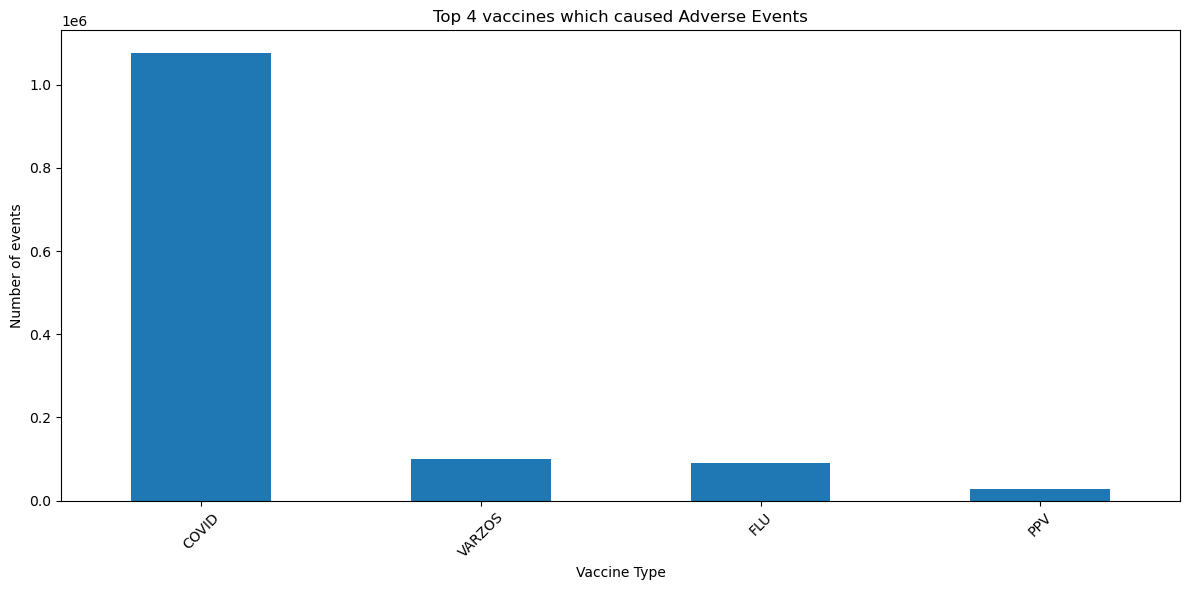

In [13]:
df_copy = vaccine_df.copy()

df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].astype('category')
# Add 'COVID' as a new category to VAX_TYPE 
df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['COVID'])

# Assign 'COVID' to the appropriate rows
df_copy.loc[df_copy['VAX_TYPE'].str.contains('COVID', case=False, na=False), 'VAX_TYPE'] = 'COVID'

# Add 'FLU' as a new category 
df_copy['VAX_TYPE'] = df_copy['VAX_TYPE'].cat.add_categories(['FLU'])

# Group flu vaccines
flu_types = ['FLU3', 'FLUN3', 'FLUN(H1N1)', 'FLU(H1N1)', 'FLUA3', 'FLU4',
             'FLUN4', 'FLUC3', 'FLUR3', 'FLUC4', 'FLUR4', 'FLUA4']
df_copy.loc[df_copy['VAX_TYPE'].isin(flu_types), 'VAX_TYPE'] = 'FLU'


# Count the occurrences of each vaccine type
vaccine_counts = df_copy['VAX_TYPE'].value_counts()

# Display the top 4 vaccine types
print(vaccine_counts.head(4))

# Plotting
plt.figure(figsize=(12, 6))
vaccine_counts.head(4).plot(kind='bar')
plt.title('Top 4 vaccines which caused Adverse Events')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

vaccine_df = df_copy

# Define common functions

In [4]:
# Sanity check
def sanity_check(df):
    """
    Performs basic checks for a DataFrame, including unique counts, null counts, and null percentages.
    
    Parameters:
    - df: pandas DataFrame.

    Returns:
    - sanity_report: DataFrame with unique counts, null counts, and null percentages.
    """
    
    return pd.DataFrame({
        'Unique Count': df.nunique(),
        'Null Count': df.isnull().sum(),
        'Null Percentage': (df.isnull().sum() / df.shape[0]) * 100
    })


In [17]:
import numpy as np

def binaryconvert(df, cols):
    """
    Converts categorical values 'Y' and 'N' in specified columns to binary 0's and 1's.
    
    Parameters:
    - df: pandas DataFrame.
    - cols: List of column names to be converted.
    
    Returns:
    - df: pandas DataFrame with specified columns converted to binary.
    """
    for col in cols:
        # Convert 'Y' to 1 and 'N' to 0
        df[col] = np.where(df[col] == "Y", 1, 0)

    return df

In [19]:
import re
import pandas as pd

def regex_clean(text):
    """Cleans the input text using regular expressions."""
    # Remove special terms, digits, and non-English symbols
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))
    text = re.sub(pattern=r'\d+', repl=' ', string=text)
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=text)
    
    return text

# Merging all dateframes

In [21]:
vaers = data_df.merge(vaccine_df, on='VAERS_ID',how='right').merge(symptom_df, on='VAERS_ID',how='inner')
print(vaers["VAERS_ID"].nunique())

1418319


In [32]:
vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106676 entries, 0 to 2106675
Data columns (total 52 columns):
 #   Column           Dtype   
---  ------           -----   
 0   VAERS_ID         int64   
 1   RECVDATE         object  
 2   STATE            object  
 3   AGE_YRS          float64 
 4   CAGE_YR          float64 
 5   CAGE_MO          float64 
 6   SEX              object  
 7   RPT_DATE         object  
 8   SYMPTOM_TEXT     object  
 9   DIED             object  
 10  DATEDIED         object  
 11  L_THREAT         object  
 12  ER_VISIT         object  
 13  HOSPITAL         object  
 14  HOSPDAYS         float64 
 15  X_STAY           object  
 16  DISABLE          object  
 17  RECOVD           object  
 18  VAX_DATE         object  
 19  ONSET_DATE       object  
 20  NUMDAYS          float64 
 21  LAB_DATA         object  
 22  V_ADMINBY        object  
 23  V_FUNDBY         object  
 24  OTHER_MEDS       object  
 25  CUR_ILL          object  
 26  HISTORY       

In [33]:
vaers.head(2)

VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX    RPT_DATE  \
0    560330  01/01/2015    UT      1.3      1.0      0.3   M  01/01/2015   
1    560331  01/01/2015    TN     66.0     66.0      NaN   F  01/01/2015   

                                        SYMPTOM_TEXT DIED  ...  SYMPTOM1  \
0  Pinpoint rash on torso, belly, back, neck, chi...  NaN  ...      Rash   
1  Around 3:30 PM 12/22/14 shaking chills, aches,...  NaN  ...  Asthenia   

  SYMPTOMVERSION1 SYMPTOM2 SYMPTOMVERSION2  SYMPTOM3 SYMPTOMVERSION3  \
0            17.1      NaN             NaN       NaN             NaN   
1            16.1   Chills            16.1  Headache            16.1   

                 SYMPTOM4 SYMPTOMVERSION4 SYMPTOM5 SYMPTOMVERSION5  
0                     NaN             NaN      NaN             NaN  
1  Laboratory test normal            16.1     Pain            16.1  

[2 rows x 52 columns]

In [34]:
vaers.shape

(2106676, 52)

In [35]:
sanity_check(vaers)

Unique Count  Null Count  Null Percentage
VAERS_ID              1418319           0         0.000000
RECVDATE                 3558           0         0.000000
STATE                     115      314812        14.943541
AGE_YRS                   358      261161        12.396828
CAGE_YR                   120      425302        20.188297
CAGE_MO                    11     2014740        95.635969
SEX                         3           0         0.000000
RPT_DATE                 2986     1928159        91.526129
SYMPTOM_TEXT          1301700        2354         0.111740
DIED                        1     2061355        97.848696
DATEDIED                 1747     2065472        98.044123
L_THREAT                    1     2057570        97.669029
ER_VISIT                    1     2056055        97.597115
HOSPITAL                    1     1843764        87.520055
HOSPDAYS                  157     1928492        91.541936
X_STAY                      1     2104823        99.912042
DISABLE                     1     2042092        96.934317
RECOVD                      3      216090        10.257391
VAX_DATE                 7125      182764         8.675468
ONSET_DATE               6069      238706        11.330931
NUMDAYS                  2604      312356        14.826960
LAB_DATA               276956     1324644        62.878392
V_ADMINBY                   9           0         0.000000
V_FUNDBY                    5     1924613        91.357807
OTHER_MEDS             410907     1041043        49.416379
CUR_ILL                107076     1424706        67.628150
HISTORY                299388     1064515        50.530551
PRIOR_VAX               55739     1998883        94.883266
SPLTTYPE               289715     1457177        69.169488
FORM_VERS                   2           0         0.000000
TODAYS_DATE              2719      203608         9.664894
BIRTH_DEFECT                1     2105002        99.920538
OFC_VISIT                   1     1635632        77.640416
ER_ED_VISIT                 1     1804176        85.640886
ALLERGIES              177215     1296882        61.560582
VAX_TYPE                   90           0         0.000000
VAX_MANU                   38           0         0.000000
VAX_LOT                 98655      610876        28.997150
VAX_DOSE_SERIES             8       24078         1.142938
VAX_ROUTE                   9      475961        22.592985
VAX_SITE                   11      561986        26.676432
VAX_NAME                  228           0         0.000000
SYMPTOM1                 9918           0         0.000000
SYMPTOMVERSION1            23           0         0.000000
SYMPTOM2                 9611      479379        22.755231
SYMPTOMVERSION2            23      479379        22.755231
SYMPTOM3                 9063      934631        44.365199
SYMPTOMVERSION3            23      934631        44.365199
SYMPTOM4                 8303     1233729        58.562826
SYMPTOMVERSION4            23     1233729        58.562826
SYMPTOM5                 7807     1450057        68.831515
SYMPTOMVERSION5            22     1450057        68.831515

# Data Cleaning

In [23]:
vaers.duplicated().value_counts()

False    2102150
True        4526
Name: count, dtype: int64

In [24]:
# drop duplicates
vaers.drop_duplicates(inplace=True)
vaers.duplicated().value_counts()

False    2102150
Name: count, dtype: int64

A new version of the VAERS form, VAERS 2, was released in July 2017. Some fields in the VAERS 1 form were modified and others discontinued.

In [25]:
# we are using Vaers version 2
# check versions
print(vaers['FORM_VERS'].value_counts())

# drop version 1
vaers.drop(vaers[vaers['FORM_VERS'] != 2].index, inplace=True)

FORM_VERS
2    1920125
1     182025
Name: count, dtype: int64


In [41]:
null_counts = vaers.isnull().sum()
null_counts

VAERS_ID                 0
RECVDATE                 0
STATE               270799
AGE_YRS             219551
CAGE_YR             372475
CAGE_MO            1857760
SEX                      0
RPT_DATE           1920124
SYMPTOM_TEXT          2287
DIED               1876196
DATEDIED           1879983
L_THREAT           1874787
ER_VISIT           1920125
HOSPITAL           1669628
HOSPDAYS           1751372
X_STAY             1918721
DISABLE            1859513
RECOVD              204077
VAX_DATE            152644
ONSET_DATE          194216
NUMDAYS             266181
LAB_DATA           1183482
V_ADMINBY                0
V_FUNDBY           1920125
OTHER_MEDS          954133
CUR_ILL            1346873
HISTORY             951593
PRIOR_VAX          1818706
SPLTTYPE           1340119
FORM_VERS                0
TODAYS_DATE          20978
BIRTH_DEFECT       1918467
OFC_VISIT          1450317
ER_ED_VISIT        1618637
ALLERGIES          1112020
VAX_TYPE                 0
VAX_MANU                 0
V

As we see there are many null values in a few columns, we are dropping them to remove irregularities.

In [29]:
# Dropping unnecessary columns
columns_to_drop = [
    'RPT_DATE', 'ER_VISIT', 'V_FUNDBY', 'RECVDATE', 'CAGE_YR', 'CAGE_MO',
    'FORM_VERS', 'LAB_DATA', 'TODAYS_DATE', 'DATEDIED',
    'SPLTTYPE', 'PRIOR_VAX', 'OFC_VISIT','X_STAY','ER_ED_VISIT',
    'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 
    'SYMPTOMVERSION4', 'SYMPTOMVERSION5'
]

# Dropping columns
vaers.drop(columns=columns_to_drop, inplace=True)


In [31]:
# drop null in age and symtom text
vaers = vaers.dropna(subset = ['AGE_YRS'])
vaers = vaers.dropna(subset = ['SYMPTOM_TEXT'])
vaers = vaers.dropna(subset = ['STATE'])

In [32]:
# List of date columns to convert
date_columns = ['VAX_DATE', 'ONSET_DATE']

# Converting the date columns to datetime format
vaers[date_columns] = vaers[date_columns].apply(pd.to_datetime)

In [35]:
# Remove rows with null values in VAX_DATE and ONSET_DATE, and keep relevant data
vaers = vaers.dropna(subset=['VAX_DATE', 'ONSET_DATE'])

# Calculate 'NUMDAYS' as the difference between ONSET_DATE and VAX_DATE
vaers['NUMDAYS'] = (vaers['ONSET_DATE'] - vaers['VAX_DATE']).dt.days

# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers = vaers[vaers['NUMDAYS'] >= 0]

# Ensure NUMDAYS is of integer type
vaers['NUMDAYS'] = vaers['NUMDAYS'].astype(int)


In [36]:
# Converting SEX column to binary
vaers['SEX'] = vaers['SEX'].replace({'U': '2', 'F': '0', 'M': '1'})

# Cleaning RECOVD column
vaers['RECOVD'] = vaers['RECOVD'].fillna(2).replace({'U': 2, 'N': 0, 'Y': 1})

# Cleaning HOSPDAYS column
vaers['HOSPDAYS'] = vaers['HOSPDAYS'].fillna(0)

# Converting STATE to uppercase
vaers['STATE'] = vaers['STATE'].str.upper()


VAERS_ID STATE  AGE_YRS SEX  \
162997     701252    FL      1.0   1   
162998     701252    FL      1.0   1   
162999     701253    VA     50.0   0   
163000     701254    IL     11.0   0   
163001     701254    IL     11.0   0   
...           ...   ...      ...  ..   
2106668   2793895    CA     72.0   0   
2106669   2793895    CA     72.0   0   
2106670   2793895    CA     72.0   0   
2106674   2793898    GA     35.0   0   
2106675   2793898    GA     35.0   0   

                                              SYMPTOM_TEXT  DIED  L_THREAT  \
162997   The day after the shots he was acting weird..C...     0         0   
162998   The day after the shots he was acting weird..C...     0         0   
162999   The patient got the ZOSTAVAX vaccine per proto...     0         0   
163000   Pt given MENVEO without incident. During admin...     0         0   
163001   Pt given MENVEO without incident. During admin...     0         0   
...                                                    ...   ...       ...   
2106668  Bilateral anterior uveitis, R>L. Onset 11 am o...     0         0   
2106669  Bilateral anterior uveitis, R>L. Onset 11 am o...     0         0   
2106670  Bilateral anterior uveitis, R>L. Onset 11 am o...     0         0   
2106674  Muscle soreness, chills, achiness, sweating, n...     0         0   
2106675  Muscle soreness, chills, achiness, sweating, n...     0         0   

         HOSPITAL  HOSPDAYS  DISABLE  ...  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
162997          0       0.0        0  ...      NaN               1        UN   
162998          0       0.0        0  ...      NaN               1        UN   
162999          0       0.0        0  ...  MO44220               1        SC   
163000          0       0.0        0  ...  N000326               1       SYR   
163001          0       0.0        0  ...   M16085               1       SYR   
...           ...       ...      ...  ...      ...             ...       ...   
2106668         0       0.0        0  ...   388464               1        IM   
2106669         0       0.0        0  ...   388464               1        IM   
2106670         0       0.0        0  ...   388464               1        IM   
2106674         0       0.0        0  ...      NaN               1       SYR   
2106675         0       0.0        0  ...      NaN               1       SYR   

         VAX_SITE                                         VAX_NAME  \
162997         LG  MEASLES + MUMPS + RUBELLA + VARICELLA (PROQUAD)   
162998         LG                              VARICELLA (VARIVAX)   
162999         LA                           ZOSTER LIVE (ZOSTAVAX)   
163000         RA                                 HPV (GARDASIL 9)   
163001         RA                 MENINGOCOCCAL CONJUGATE (MENVEO)   
...           ...                                              ...   
2106668        LA                     INFLUENZA (SEASONAL) (FLUAD)   
2106669        LA                     INFLUENZA (SEASONAL) (FLUAD)   
2106670        LA                     INFLUENZA (SEASONAL) (FLUAD)   
2106674        RA              COVID19 (COVID19 (PFIZER-BIONTECH))   
2106675        RA              COVID19 (COVID19 (PFIZER-BIONTECH))   

                                      SYMPTOM1  \
162997                                  Abasia   
162998                                  Abasia   
162999                              Cellulitis   
163000                                    Pain   
163001                                    Pain   
...                                        ...   
2106668  Blood lactate dehydrogenase increased   
2106669                         Iris adhesions   
2106670                         Treponema test   
2106674                                 Chills   
2106675                                 Nausea   

                                                 SYMPTOM2  \
162997                                        Daydreaming   
162998                                        Daydreaming   
16299

In [39]:
# Convert all string values in the DataFrame to uppercase
vaers = vaers.applymap(lambda x: x.upper() if isinstance(x, str) else x)
vaers.head(2)

VAERS_ID STATE  AGE_YRS SEX  \
162997    701252    FL      1.0   1   
162998    701252    FL      1.0   1   

                                             SYMPTOM_TEXT DIED L_THREAT  \
162997  THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD..C...  NaN      NaN   
162998  THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD..C...  NaN      NaN   

       HOSPITAL  HOSPDAYS DISABLE  ...  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
162997      NaN       0.0     NaN  ...      NaN               1        UN   
162998      NaN       0.0     NaN  ...      NaN               1        UN   

        VAX_SITE                                         VAX_NAME SYMPTOM1  \
162997        LG  MEASLES + MUMPS + RUBELLA + VARICELLA (PROQUAD)   ABASIA   
162998        LG                              VARICELLA (VARIVAX)   ABASIA   

           SYMPTOM2 SYMPTOM3 SYMPTOM4 SYMPTOM5  
162997  DAYDREAMING      NaN      NaN      NaN  
162998  DAYDREAMING      NaN      NaN      NaN  

[2 rows x 32 columns]

In [40]:
# Columns to clean
cols_to_clean = ['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES', 'CUR_ILL']

# Apply the regex_clean function to each specified column
for col in cols_to_clean:
    vaers[col] = vaers[col].apply(regex_clean)

In [41]:
# Replace in OTHER_MEDS
vaers['OTHER_MEDS'] = vaers['OTHER_MEDS'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in CUR_ILL
vaers['CUR_ILL'] = vaers['CUR_ILL'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in HISTORY
vaers['HISTORY'] = vaers['HISTORY'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in ALLERGIES
vaers['ALLERGIES'] = vaers['ALLERGIES'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

In [42]:
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for column in symptom_columns:
    vaers[column] = vaers[column].replace([np.nan, 'NAN'], ' ', regex=True)

In [43]:
# Define the irrelevant symptoms to check
irrelevant_symptoms = [
    'PRODUCT ADMINISTERED TO PATIENT OF INAPPROPRIATE AGE'
    'NO ADVERSE EVENT',
    'INAPPROPRIATE SCHEDULE OF PRODUCT ADMINISTRATION',
    'SARS-COV-2 TEST',
    'BACTERIAL TEST NEGATIVE',
    'WRONG DRUG ADMINISTERED',
    'UNEVALUABLE EVENT',
    'PRODUCT STORAGE ERROR',
    'SARS-COV-2 TEST POSITIVE',
    'EXPIRED PRODUCT ADMINISTERED'
]

# Check if any of the irrelevant symptoms are present in the specified columns
mask = vaers[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].isin(irrelevant_symptoms)

# Check if there are any irrelevant symptoms in the DataFrame
if mask.any().any():
    print("Irrelevant symptoms found in the DataFrame.")
else:
    print("No irrelevant symptoms found in the DataFrame.")

Irrelevant symptoms found in the DataFrame.


In [44]:
# Dropping irrelevant symptoms 
mask = ~(
    (vaers[['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']].isin(irrelevant_symptoms)).any(axis=1)
)

# Filter the DataFrame
vaers = vaers[mask]
vaers.reset_index(drop=True, inplace=True)

In [59]:
# Convert specified columns in the DataFrame to binary values.
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT']
binaryconvert(vaers,cols)

VAERS_ID STATE  AGE_YRS SEX  \
0          701252    FL      1.0   1   
1          701252    FL      1.0   1   
2          701253    VA     50.0   0   
3          701254    IL     11.0   0   
4          701254    IL     11.0   0   
...           ...   ...      ...  ..   
1247579   2793895    CA     72.0   0   
1247580   2793895    CA     72.0   0   
1247581   2793895    CA     72.0   0   
1247582   2793898    GA     35.0   0   
1247583   2793898    GA     35.0   0   

                                              SYMPTOM_TEXT  DIED  L_THREAT  \
0        THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD CO...     0         0   
1        THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD CO...     0         0   
2        THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...     0         0   
3        PT GIVEN MENVEO WITHOUT INCIDENT DURING ADMINI...     0         0   
4        PT GIVEN MENVEO WITHOUT INCIDENT DURING ADMINI...     0         0   
...                                                    ...   ...       ...   
1247579  BILATERAL ANTERIOR UVEITIS R L ONSET AM ON TUE...     0         0   
1247580  BILATERAL ANTERIOR UVEITIS R L ONSET AM ON TUE...     0         0   
1247581  BILATERAL ANTERIOR UVEITIS R L ONSET AM ON TUE...     0         0   
1247582  MUSCLE SORENESS CHILLS ACHINESS SWEATING NAUSE...     0         0   
1247583  MUSCLE SORENESS CHILLS ACHINESS SWEATING NAUSE...     0         0   

         HOSPITAL  HOSPDAYS  DISABLE  ...  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0               0       0.0        0  ...      NaN               1        UN   
1               0       0.0        0  ...      NaN               1        UN   
2               0       0.0        0  ...  MO44220               1        SC   
3               0       0.0        0  ...  N000326               1       SYR   
4               0       0.0        0  ...   M16085               1       SYR   
...           ...       ...      ...  ...      ...             ...       ...   
1247579         0       0.0        0  ...   388464               1        IM   
1247580         0       0.0        0  ...   388464               1        IM   
1247581         0       0.0        0  ...   388464               1        IM   
1247582         0       0.0        0  ...      NaN               1       SYR   
1247583         0       0.0        0  ...      NaN               1       SYR   

         VAX_SITE                                         VAX_NAME  \
0              LG  MEASLES + MUMPS + RUBELLA + VARICELLA (PROQUAD)   
1              LG                              VARICELLA (VARIVAX)   
2              LA                           ZOSTER LIVE (ZOSTAVAX)   
3              RA                                 HPV (GARDASIL 9)   
4              RA                 MENINGOCOCCAL CONJUGATE (MENVEO)   
...           ...                                              ...   
1247579        LA                     INFLUENZA (SEASONAL) (FLUAD)   
1247580        LA                     INFLUENZA (SEASONAL) (FLUAD)   
1247581        LA                     INFLUENZA (SEASONAL) (FLUAD)   
1247582        RA              COVID19 (COVID19 (PFIZER-BIONTECH))   
1247583        RA              COVID19 (COVID19 (PFIZER-BIONTECH))   

                                      SYMPTOM1  \
0                                       ABASIA   
1                                       ABASIA   
2                                   CELLULITIS   
3                                         PAIN   
4                                         PAIN   
...                                        ...   
1247579  BLOOD LACTATE DEHYDROGENASE INCREASED   
1247580                         IRIS ADHESIONS   
1247581                         TREPONEMA TEST   
1247582                                 CHILLS   
1247583                                 NAUSEA   

                                                 SYMPTOM2  \
0                                             DAYDREAMING   
1                                             DAYDREAMING   
2    

In [61]:
vaers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247584 entries, 0 to 1247583
Data columns (total 32 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   VAERS_ID         1247584 non-null  int64         
 1   STATE            1247584 non-null  object        
 2   AGE_YRS          1247584 non-null  float64       
 3   SEX              1247584 non-null  object        
 4   SYMPTOM_TEXT     1247584 non-null  object        
 5   DIED             1247584 non-null  int32         
 6   L_THREAT         1247584 non-null  int32         
 7   HOSPITAL         1247584 non-null  int32         
 8   HOSPDAYS         1247584 non-null  float64       
 9   DISABLE          1247584 non-null  int32         
 10  RECOVD           1247584 non-null  int64         
 11  VAX_DATE         1247584 non-null  datetime64[ns]
 12  ONSET_DATE       1247584 non-null  datetime64[ns]
 13  NUMDAYS          1247584 non-null  int64         
 14  V_

In [63]:
sanity_check(vaers)

Unique Count  Null Count  Null Percentage
VAERS_ID               798505           0         0.000000
STATE                      64           0         0.000000
AGE_YRS                   161           0         0.000000
SEX                         3           0         0.000000
SYMPTOM_TEXT           765328           0         0.000000
DIED                        2           0         0.000000
L_THREAT                    2           0         0.000000
HOSPITAL                    2           0         0.000000
HOSPDAYS                  141           0         0.000000
DISABLE                     2           0         0.000000
RECOVD                      3           0         0.000000
VAX_DATE                 4765           0         0.000000
ONSET_DATE               4058           0         0.000000
NUMDAYS                  1896           0         0.000000
V_ADMINBY                   9           0         0.000000
OTHER_MEDS             331062           0         0.000000
CUR_ILL                 74111           0         0.000000
HISTORY                207145           0         0.000000
BIRTH_DEFECT                2           0         0.000000
ALLERGIES              148373           0         0.000000
VAX_TYPE                   74           0         0.000000
VAX_MANU                   31           0         0.000000
VAX_LOT                 59341      309057        24.772440
VAX_DOSE_SERIES             8       20801         1.667303
VAX_ROUTE                   9      193224        15.487855
VAX_SITE                   11      197193        15.805990
VAX_NAME                  173           0         0.000000
SYMPTOM1                 8521           0         0.000000
SYMPTOM2                 8286           0         0.000000
SYMPTOM3                 7846           0         0.000000
SYMPTOM4                 7182           0         0.000000
SYMPTOM5                 6754           0         0.000000

In [67]:
vaers.head(2)

VAERS_ID STATE  AGE_YRS SEX  \
0    701252    FL      1.0   1   
1    701252    FL      1.0   1   

                                        SYMPTOM_TEXT  DIED  L_THREAT  \
0  THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD CO...     0         0   
1  THE DAY AFTER THE SHOTS HE WAS ACTING WEIRD CO...     0         0   

   HOSPITAL  HOSPDAYS  DISABLE  ...  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE  \
0         0       0.0        0  ...      NaN               1        UN   
1         0       0.0        0  ...      NaN               1        UN   

   VAX_SITE                                         VAX_NAME SYMPTOM1  \
0        LG  MEASLES + MUMPS + RUBELLA + VARICELLA (PROQUAD)   ABASIA   
1        LG                              VARICELLA (VARIVAX)   ABASIA   

      SYMPTOM2 SYMPTOM3  SYMPTOM4 SYMPTOM5  
0  DAYDREAMING                              
1  DAYDREAMING                              

[2 rows x 32 columns]

In [69]:
vaers.to_csv('C:/Users/chand/Downloads/606/vaers.csv', index=False)

In [71]:
vaers.shape

(1247584, 32)

# Load Data for EDA

In [1]:
import pandas as pd
vaers_df = pd.read_csv(r'C:/Users/chand/Downloads/606/vaers.csv')

In [20]:
vaers_df = vaers_df.dropna(subset = ['SYMPTOM_TEXT'])
sanity_check(vaers_df)

Unique Count  Null Count  Null Percentage
VAERS_ID               798493           0         0.000000
STATE                      64           0         0.000000
AGE_YRS                   161           0         0.000000
SEX                         3           0         0.000000
SYMPTOM_TEXT           765327           0         0.000000
DIED                        2           0         0.000000
L_THREAT                    2           0         0.000000
HOSPITAL                    2           0         0.000000
HOSPDAYS                  141           0         0.000000
DISABLE                     2           0         0.000000
RECOVD                      3           0         0.000000
VAX_DATE                 4765           0         0.000000
ONSET_DATE               4058           0         0.000000
NUMDAYS                  1896           0         0.000000
V_ADMINBY                   9           0         0.000000
OTHER_MEDS             331059           0         0.000000
CUR_ILL                 74109           0         0.000000
HISTORY                207143           0         0.000000
BIRTH_DEFECT                2           0         0.000000
ALLERGIES              148370           0         0.000000
VAX_TYPE                   74           0         0.000000
VAX_MANU                   31           0         0.000000
VAX_LOT                 59339      309164        24.781275
VAX_DOSE_SERIES             8       20801         1.667320
VAX_ROUTE                   9      193223        15.487936
VAX_SITE                   11      197191        15.805994
VAX_NAME                  173           0         0.000000
SYMPTOM1                 8521           0         0.000000
SYMPTOM2                 8286           0         0.000000
SYMPTOM3                 7846           0         0.000000
SYMPTOM4                 7182           0         0.000000
SYMPTOM5                 6754           0         0.000000

In [14]:
# Replace in OTHER_MEDS
vaers_df['OTHER_MEDS'] = vaers_df['OTHER_MEDS'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in CUR_ILL
vaers_df['CUR_ILL'] = vaers_df['CUR_ILL'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in HISTORY
vaers_df['HISTORY'] = vaers_df['HISTORY'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

# Replace in ALLERGIES
vaers_df['ALLERGIES'] = vaers_df['ALLERGIES'].replace([np.nan, 'NAN', 'NONE', 'UNKNOWN'], ' ', regex=True)

symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
for column in symptom_columns:
    vaers_df[column] = vaers_df[column].replace([np.nan, 'NAN'], ' ', regex=True)

In [22]:
sanity_check(vaers_df)

Unique Count  Null Count  Null Percentage
VAERS_ID               798493           0         0.000000
STATE                      64           0         0.000000
AGE_YRS                   161           0         0.000000
SEX                         3           0         0.000000
SYMPTOM_TEXT           765327           0         0.000000
DIED                        2           0         0.000000
L_THREAT                    2           0         0.000000
HOSPITAL                    2           0         0.000000
HOSPDAYS                  141           0         0.000000
DISABLE                     2           0         0.000000
RECOVD                      3           0         0.000000
VAX_DATE                 4765           0         0.000000
ONSET_DATE               4058           0         0.000000
NUMDAYS                  1896           0         0.000000
V_ADMINBY                   9           0         0.000000
OTHER_MEDS             331059           0         0.000000
CUR_ILL                 74109           0         0.000000
HISTORY                207143           0         0.000000
BIRTH_DEFECT                2           0         0.000000
ALLERGIES              148370           0         0.000000
VAX_TYPE                   74           0         0.000000
VAX_MANU                   31           0         0.000000
VAX_LOT                 59339      309164        24.781275
VAX_DOSE_SERIES             8       20801         1.667320
VAX_ROUTE                   9      193223        15.487936
VAX_SITE                   11      197191        15.805994
VAX_NAME                  173           0         0.000000
SYMPTOM1                 8521           0         0.000000
SYMPTOM2                 8286           0         0.000000
SYMPTOM3                 7846           0         0.000000
SYMPTOM4                 7182           0         0.000000
SYMPTOM5                 6754           0         0.000000

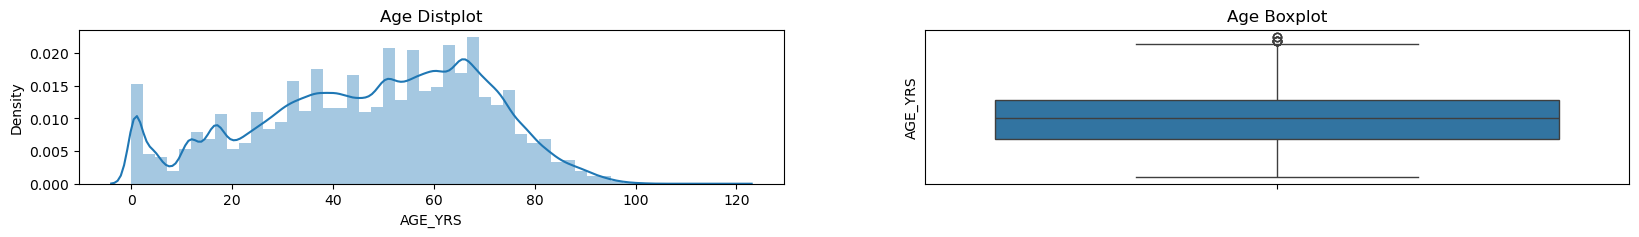

In [23]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_df['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_df['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [25]:
# Filter the dataframe for ages between 5 and 90 years
vaers_df = vaers_df[(vaers_df['AGE_YRS'] >= 5) & (vaers_df['AGE_YRS'] <= 90)]

<Axes: title={'center': 'vaccine route of administration'}, xlabel='VAX_ROUTE'>

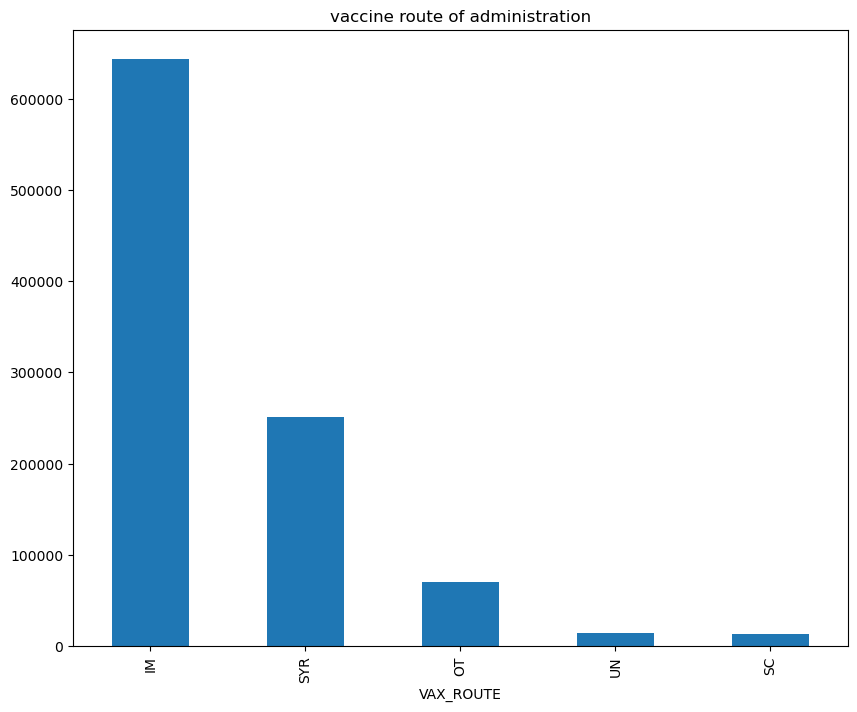

In [26]:
plt.figure(figsize=(10,8))
route = vaers_df['VAX_ROUTE'].value_counts().sort_values(ascending=False)[:5]
route.plot(kind='bar', title='vaccine route of administration')

<Axes: title={'center': 'Vacination Site '}, ylabel='VAX_SITE'>

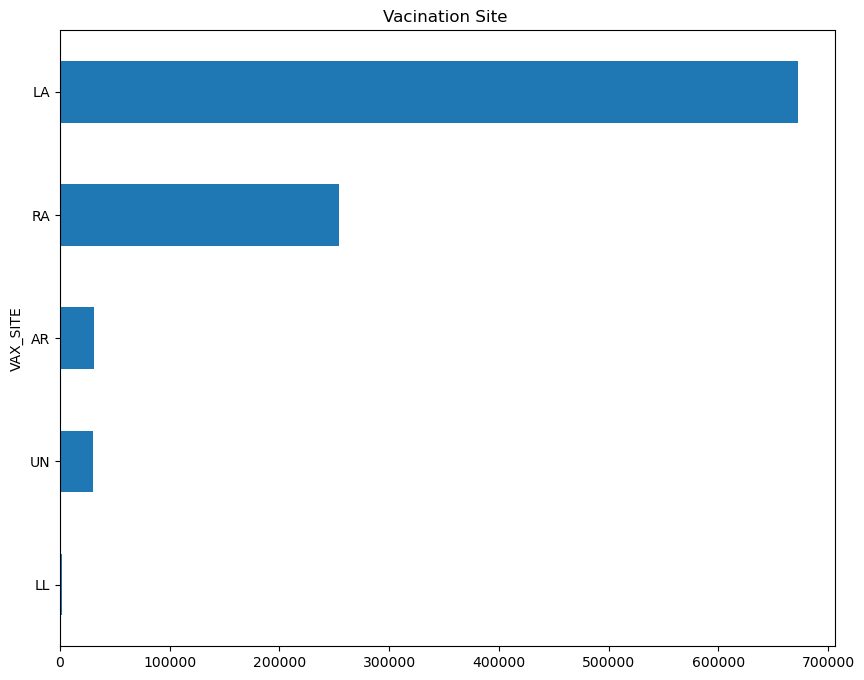

In [27]:
plt.figure(figsize=(10,8))
site = vaers_df['VAX_SITE'].value_counts().sort_values(ascending=True)[-5:]
site.plot(kind='barh', title='Vacination Site ')

<Axes: title={'center': 'Lot number of the vaccines'}, ylabel='VAX_LOT'>

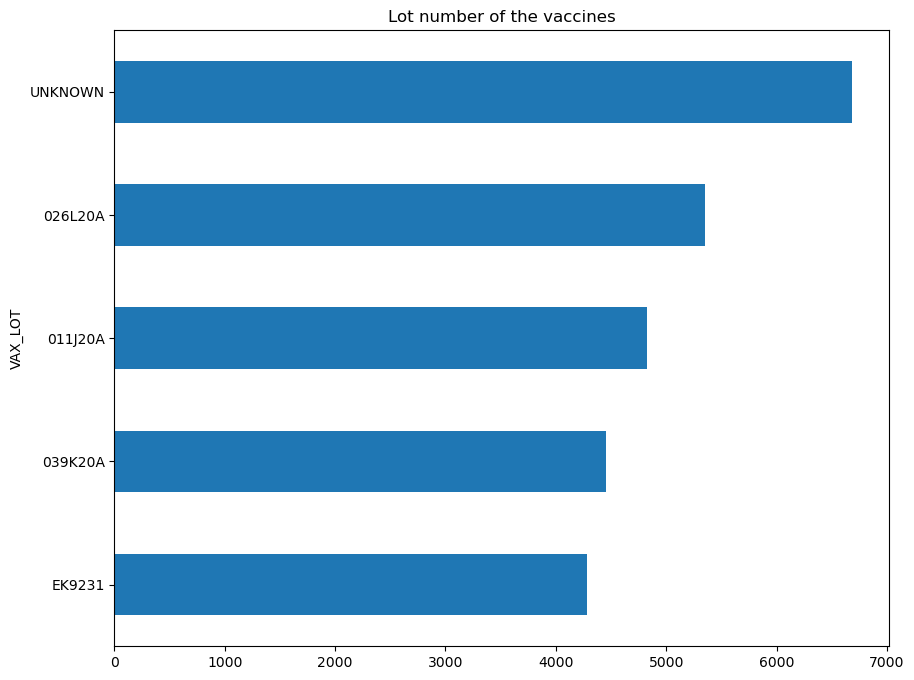

In [28]:
plt.figure(figsize=(10,8))
lot = vaers_df['VAX_LOT'].value_counts().sort_values(ascending=True)[-5:]
lot.plot(kind='barh', title='Lot number of the vaccines')

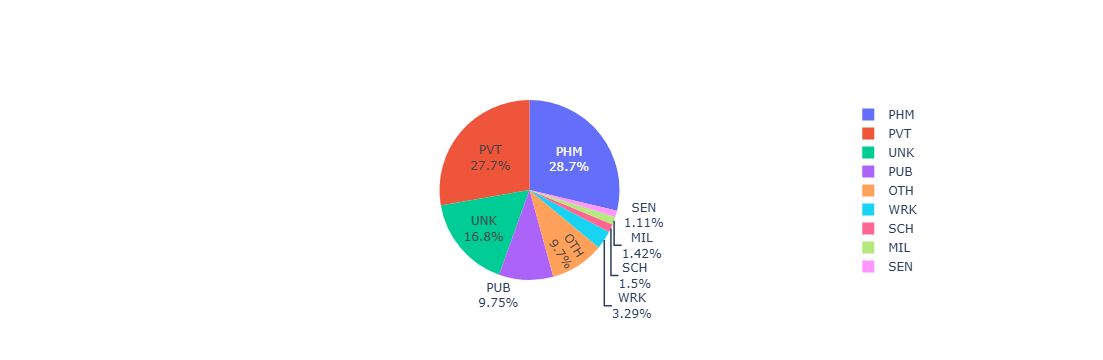

In [31]:
# Where was the vaccine given/administered

import plotly.graph_objects as go
g_index = vaers_df['V_ADMINBY'].value_counts().index
g_value = vaers_df['V_ADMINBY'].value_counts().values
fig = go.Figure(data=[go.Pie(labels=g_index,values=g_value,textinfo = 'label + percent')])
fig.show()

<Axes: title={'center': 'Lot number of the vaccines'}, xlabel='VAX_DOSE_SERIES'>

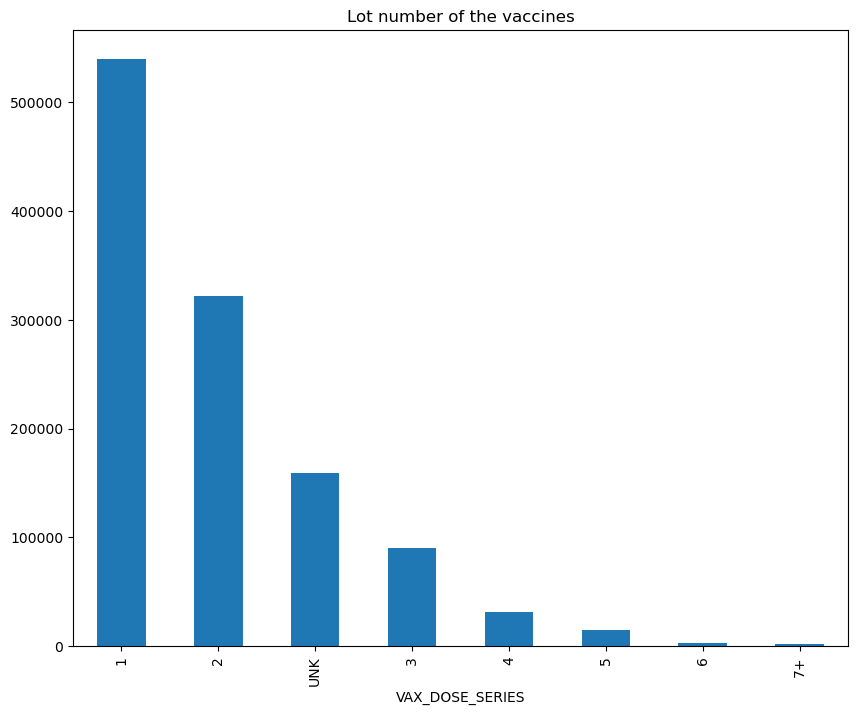

In [35]:
plt.figure(figsize=(10,8))
lot = vaers_df['VAX_DOSE_SERIES'].value_counts().sort_values(ascending=False)[-10:]
lot.plot(kind='bar', title='Lot number of the vaccines')

## From the above we found that there is no significant information which we can use for further analysis so we are dropping the columns

In [38]:
vaers_df = vaers_df.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'V_ADMINBY'])
vaers_df.head(2)

VAERS_ID STATE  AGE_YRS  SEX  \
2    701253    VA     50.0    0   
3    701254    IL     11.0    0   

                                        SYMPTOM_TEXT  DIED  L_THREAT  \
2  THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...     0         0   
3  PT GIVEN MENVEO WITHOUT INCIDENT DURING ADMINI...     0         0   

   HOSPITAL  HOSPDAYS  DISABLE  ...  BIRTH_DEFECT                ALLERGIES  \
2         0       0.0        0  ...             0  LINZES TRAMADOL VALTREX   
3         0       0.0        0  ...             0             AVOCADO KIWI   

  VAX_TYPE          VAX_MANU                VAX_NAME    SYMPTOM1  \
2   VARZOS  MERCK & CO. INC.  ZOSTER LIVE (ZOSTAVAX)  CELLULITIS   
3     HPV9  MERCK & CO. INC.        HPV (GARDASIL 9)        PAIN   

              SYMPTOM2               SYMPTOM3 SYMPTOM4 SYMPTOM5  
2  INJECTION SITE RASH  INJECTION SITE WARMTH                    
3    RHINITIS ALLERGIC   URINARY INCONTINENCE                    

[2 rows x 27 columns]

In [40]:
vaers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1179568 entries, 2 to 1247583
Data columns (total 27 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1179568 non-null  int64  
 1   STATE         1179568 non-null  object 
 2   AGE_YRS       1179568 non-null  float64
 3   SEX           1179568 non-null  int64  
 4   SYMPTOM_TEXT  1179568 non-null  object 
 5   DIED          1179568 non-null  int64  
 6   L_THREAT      1179568 non-null  int64  
 7   HOSPITAL      1179568 non-null  int64  
 8   HOSPDAYS      1179568 non-null  float64
 9   DISABLE       1179568 non-null  int64  
 10  RECOVD        1179568 non-null  int64  
 11  VAX_DATE      1179568 non-null  object 
 12  ONSET_DATE    1179568 non-null  object 
 13  NUMDAYS       1179568 non-null  int64  
 14  OTHER_MEDS    1179568 non-null  object 
 15  CUR_ILL       1179568 non-null  object 
 16  HISTORY       1179568 non-null  object 
 17  BIRTH_DEFECT  1179568 non-null  

In [42]:
vaers_df.to_csv('C:/Users/chand/Downloads/606/vaers_cleaned.csv', index=False)

In [46]:
vaers_df.shape

(1179568, 27)

## Merging symptoms 1-5 as a single column symptom

In [43]:
vaers_df.loc[vaers_df.duplicated(subset=['VAERS_ID']), :]

VAERS_ID STATE  AGE_YRS  SEX  \
4          701254    IL     11.0    0   
9          701258    TN     19.0    0   
11         701260    MA     54.0    1   
16         701265    NJ     18.0    0   
18         701266    NC     79.0    0   
...           ...   ...      ...  ...   
1247574   2793889    WA     56.0    0   
1247577   2793892    WI     70.0    1   
1247580   2793895    CA     72.0    0   
1247581   2793895    CA     72.0    0   
1247583   2793898    GA     35.0    0   

                                              SYMPTOM_TEXT  DIED  L_THREAT  \
4        PT GIVEN MENVEO WITHOUT INCIDENT DURING ADMINI...     0         0   
9        SWOLLEN LIPS FEVER HEADACHE JOINT PAIN NUMBNES...     0         0   
11       CHILLS FEVER MALAISE L ARM PAIN L ARM AT DELTO...     0         0   
16       PATIENT RECEIVED VACCINE ON AND WHILE LEAVING ...     0         0   
18        YO FEMALE WAS GIVEN TDAP VACCINE ML IM AND PN...     0         0   
...                                                    ...   ...       ...   
1247574  RASH BEGAN BEHIND LEFT KNEE AND INSIDE LEFT EL...     0         0   
1247577  ON HIS LEFT ARM WHERE HE RECEIVED THE HIGH DOS...     0         0   
1247580  BILATERAL ANTERIOR UVEITIS R L ONSET AM ON TUE...     0         0   
1247581  BILATERAL ANTERIOR UVEITIS R L ONSET AM ON TUE...     0         0   
1247583  MUSCLE SORENESS CHILLS ACHINESS SWEATING NAUSE...     0         0   

         HOSPITAL  HOSPDAYS  DISABLE  ...  BIRTH_DEFECT  \
4               0       0.0        0  ...             0   
9               0       0.0        0  ...             0   
11              0       0.0        0  ...             0   
16              0       0.0        0  ...             0   
18              0       0.0        0  ...             0   
...           ...       ...      ...  ...           ...   
1247574         0       0.0        0  ...             0   
1247577         0       0.0        0  ...             0   
1247580         0       0.0        0  ...             0   
1247581         0       0.0        0  ...             0   
1247583         0       0.0        0  ...             0   

                                                 ALLERGIES VAX_TYPE  \
4                                             AVOCADO KIWI      MNQ   
9                                                     NKDA     HPV9   
11                                                    NKDA     TDAP   
16                  NO KNOWN ALLERGIES TO FOOD MEDICATIONS     MENB   
18                                                            PNC13   
...                                                    ...      ...   
1247574  SEVERE SKIN RASH KNOWN ALLERGY TO BACTRIM ANTI...      FLU   
1247577         AMOXICILLIN CIPROFLOXACIN SULFAMETHOXAZOLE      FLU   
1247580  MILD CONTACT DERMATITIS WITH PROLONGED LATEX E...      FLU   
1247581  MILD CONTACT DERMATITIS WITH PROLONGED LATEX E...      FLU   
1247583                                         PENICILLIN    COVID   

                                  VAX_MANU  \
4        NOVARTIS VACCINES AND DIAGNOSTICS   
9                         MERCK & CO. INC.   
11                          SANOFI PASTEUR   
16       NOVARTIS VACCINES AND DIAGNOSTICS   
18                            PFIZER\WYETH   
...                                    ...   
1247574                     SANOFI PASTEUR   
1247577                     SANOFI PASTEUR   
1247580                      SEQIRUS, INC.   
1247581                      SEQIRUS, INC.   
1247583                    PFIZER\BIONTECH   

                                         VAX_NAME                 SYMPTOM1  \
4                MENINGOCOCCAL CONJUGATE (MENVEO)                     PAIN   
9                                HPV (GARDASIL 9)             PARAESTHESIA   
11                                  TDAP (ADACEL)  INJECTION SITE SWELLING   
16                      MENINGOCOCCAL B (BEXSERO)                   NAUSEA   
18                             PNEUMO (PREVNAR13)  INJECTION SITE SWELLING

In [48]:
vaers_df.shape

(1179568, 27)

In [50]:
# First, combine all symptom columns into a single list
vaers = vaers_df.copy()
symptom_columns = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
vaers_df['SYMPTOMS'] = vaers_df[symptom_columns].apply(lambda row: ','.join(row.dropna()), axis=1)

# Now, drop the individual symptom columns
vaers_df = vaers_df.drop(columns=symptom_columns)

# Group by VAERS_ID and SYMPTOMS, then reset the index
vaers_df = vaers_df.groupby(['VAERS_ID', 'SYMPTOMS']).first().reset_index()

# Split the SYMPTOMS string into a list
vaers_df['SYMPTOMS'] = vaers_df['SYMPTOMS'].str.split(',')

# Remove any empty strings from the SYMPTOMS lists
vaers_df['SYMPTOMS'] = vaers_df['SYMPTOMS'].apply(lambda x: [sym.strip() for sym in x if sym.strip()])

In [51]:
vaers_df.head(2)

VAERS_ID                                           SYMPTOMS STATE  AGE_YRS  \
0    701253  [CELLULITIS, INJECTION SITE RASH, INJECTION SI...    VA     50.0   
1    701254    [PAIN, RHINITIS ALLERGIC, URINARY INCONTINENCE]    IL     11.0   

   SEX                                       SYMPTOM_TEXT  DIED  L_THREAT  \
0    0  THE PATIENT GOT THE ZOSTAVAX VACCINE PER PROTO...     0         0   
1    0  PT GIVEN MENVEO WITHOUT INCIDENT DURING ADMINI...     0         0   

   HOSPITAL  HOSPDAYS  ...  ONSET_DATE  NUMDAYS  \
0         0       0.0  ...  2017-06-28        3   
1         0       0.0  ...  2017-06-14        0   

                             OTHER_MEDS CUR_ILL                   HISTORY  \
0  CYMBALTA ALDACTONE PRILOSEC ATENOLOL          HIGH BLOOD PRESSURE GERD   
1                                            NO         ALLERGIC RHINITIS   

  BIRTH_DEFECT                ALLERGIES VAX_TYPE          VAX_MANU  \
0            0  LINZES TRAMADOL VALTREX   VARZOS  MERCK & CO. INC.   
1            0             AVOCADO KIWI     HPV9  MERCK & CO. INC.   

                 VAX_NAME  
0  ZOSTER LIVE (ZOSTAVAX)  
1        HPV (GARDASIL 9)  

[2 rows x 23 columns]

In [52]:
sym_df = vaers_df[['VAERS_ID', 'SYMPTOMS']]
sym_df.head(2)

VAERS_ID                                           SYMPTOMS
0    701253  [CELLULITIS, INJECTION SITE RASH, INJECTION SI...
1    701254    [PAIN, RHINITIS ALLERGIC, URINARY INCONTINENCE]

In [53]:
sym_df.explode('SYMPTOMS')

VAERS_ID               SYMPTOMS
0          701253             CELLULITIS
0          701253    INJECTION SITE RASH
0          701253  INJECTION SITE WARMTH
1          701254                   PAIN
1          701254      RHINITIS ALLERGIC
...           ...                    ...
1066335   2793898               HEADACHE
1066335   2793898          HYPERHIDROSIS
1066335   2793898                MYALGIA
1066336   2793898                 NAUSEA
1066336   2793898                   PAIN

[3577821 rows x 2 columns]

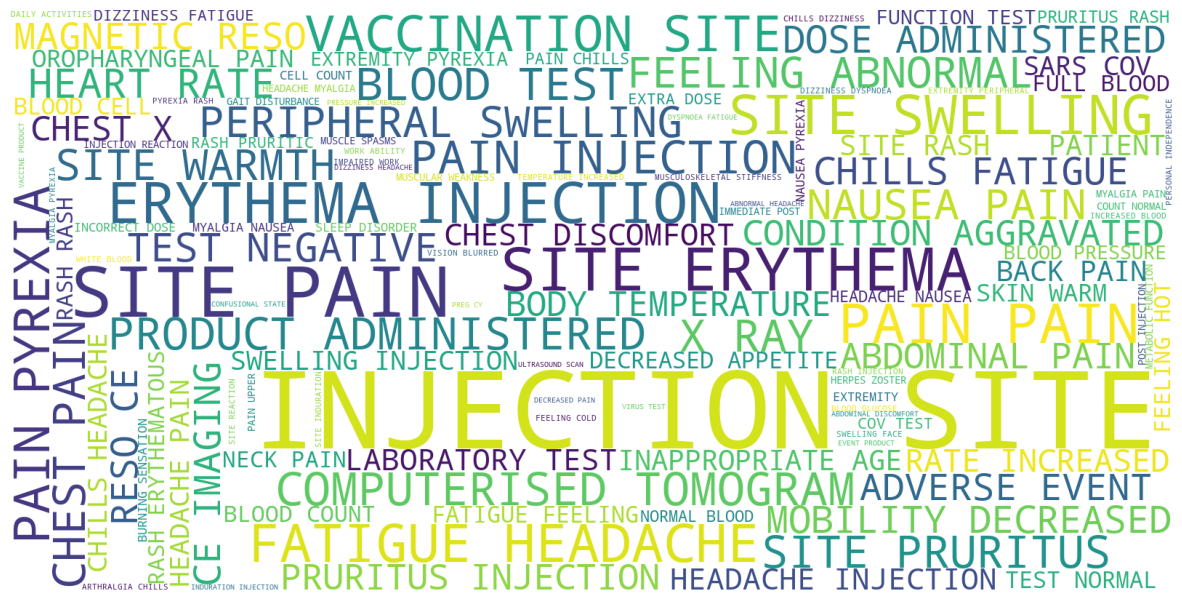

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Flatten the list of symptoms and join them into a single string
all_symptoms = ' '.join([' '.join(symptoms) for symptoms in sym_df.SYMPTOMS])

wordcloud2 = WordCloud(width=1600, height=800, 
                       background_color='white', 
                       min_font_size=10).generate(all_symptoms)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [55]:
unique_ade = [val.strip() for sublist in vaers_df.SYMPTOMS for val in sublist if isinstance(val, str)]

In [56]:
# Flatten the list of symptoms
all_symptoms = [symptom for symptoms_list in vaers_df['SYMPTOMS'] for symptom in symptoms_list if isinstance(symptom, str)]

# Create a DataFrame with symptom counts
symptoms_summary = pd.DataFrame(all_symptoms, columns=['SYMPTOMS'])
symptoms_summary = symptoms_summary['SYMPTOMS'].value_counts().reset_index()
symptoms_summary.columns = ['SYMPTOMS', 'count']

In [57]:
symptoms_summary[0:10]

SYMPTOMS   count
0             HEADACHE  130487
1              FATIGUE  113257
2              PYREXIA  112080
3                 PAIN  106060
4               CHILLS   97083
5    PAIN IN EXTREMITY   77985
6            DIZZINESS   76799
7               NAUSEA   75804
8  INJECTION SITE PAIN   58234
9           ARTHRALGIA   47197

In [58]:
symptoms_summary.SYMPTOMS[0:5]

0    HEADACHE
1     FATIGUE
2     PYREXIA
3        PAIN
4      CHILLS
Name: SYMPTOMS, dtype: object

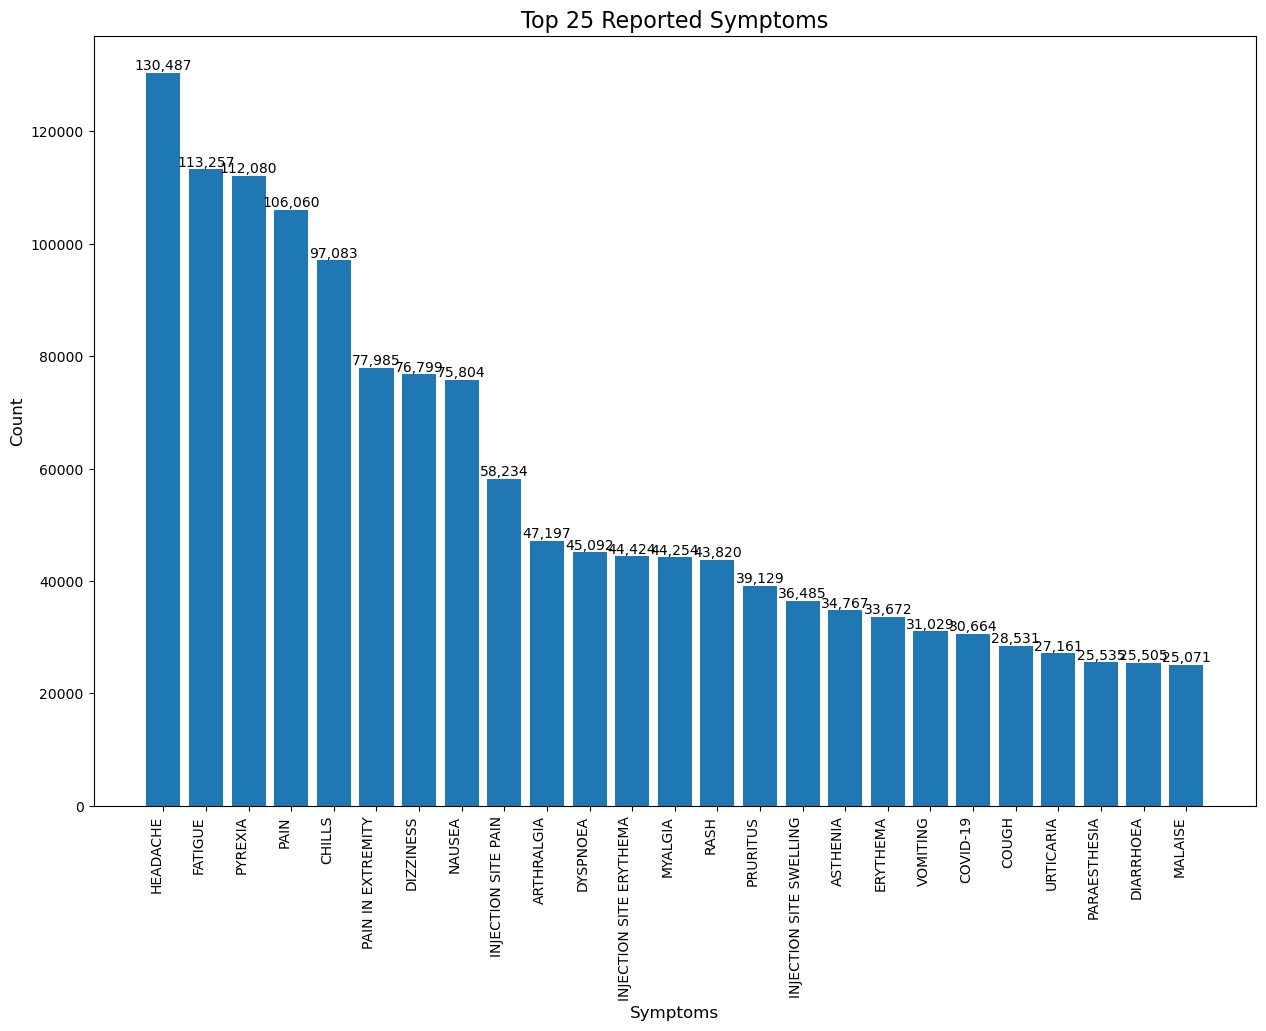

In [59]:
top_25_symptoms = symptoms_summary.sort_values('count', ascending=False).head(25)
total_count = symptoms_summary['count'].sum()

# Create the plot
plt.figure(figsize=(15, 10))
bars = plt.bar(top_25_symptoms['SYMPTOMS'], top_25_symptoms['count'])

plt.xticks(rotation=90, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}',
             ha='center', va='bottom')

plt.title('Top 25 Reported Symptoms', fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()